In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
import warnings

In [2]:
house_price_dataset = fetch_california_housing(as_frame=True)
house_price_dataset = house_price_dataset.frame

print(house_price_dataset.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
house_price_dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
house_price_dataset['price']=house_price_dataset['MedHouseVal']
house_price_dataframe = house_price_dataset.drop(['MedHouseVal'],axis = 1)

In [5]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
house_price_dataframe.shape

(20640, 9)

In [7]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [8]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
correlation = house_price_dataframe.corr()

<Axes: >

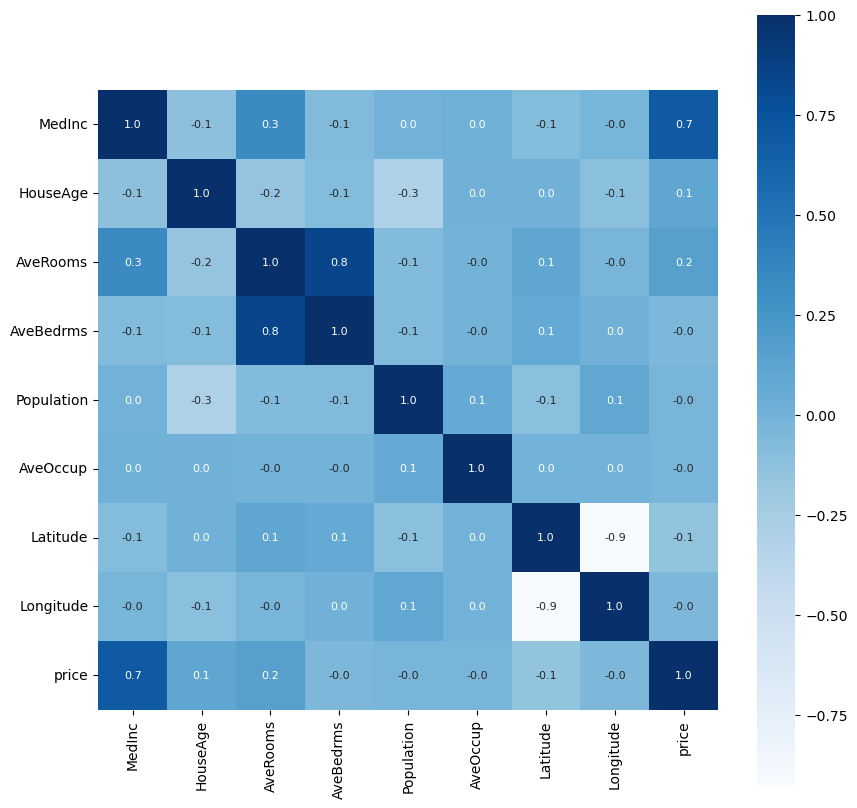

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

## LinearRegression vs XGBRegressor

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

Y_pred_lr = lr_model.predict(X_test)
Y_pred_xgb = xgb_model.predict(X_test)

mse_lr = mean_squared_error(Y_test, Y_pred_lr)
mae_lr = mean_absolute_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)

mse_xgb = mean_squared_error(Y_test, Y_pred_xgb)
mae_xgb = mean_absolute_error(Y_test, Y_pred_xgb)
r2_xgb = r2_score(Y_test, Y_pred_xgb)

print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("R² Score:", r2_lr)

print("\nXGBRegressor:")
print("Mean Squared Error:", mse_xgb)
print("Mean Absolute Error:", mae_xgb)
print("R² Score:", r2_xgb)


Linear Regression:
Mean Squared Error: 0.5369436868087006
Mean Absolute Error: 0.535829254965777
R² Score: 0.6013853272055152

XGBRegressor:
Mean Squared Error: 0.22387540906811954
Mean Absolute Error: 0.3108631800268186
R² Score: 0.8338000331788725


## K-Fold Cross-Validation

In [16]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)

lr_scores = cross_val_score(lr_model, X, Y, cv=kf, scoring='r2')
lr_mse_scores = cross_val_score(lr_model, X, Y, cv=kf, scoring= mse_scorer)
lr_mae_scores = cross_val_score(lr_model, X, Y, cv=kf, scoring= mae_scorer)

print("Linear Regression R² Scores:", lr_scores)
print("Mean R² Score for Linear Regression:", lr_scores.mean())
print("Linear Regression MSE Scores:", lr_mse_scores)
print("Mean MSE Score for Linear Regression:", lr_mse_scores.mean())
print("Linear Regression MAE Scores:", lr_mae_scores)
print("Mean MAE Score for Linear Regression:", lr_mae_scores.mean())

xgb_r2_scores = cross_val_score(xgb_model, X, Y, cv=kf, scoring='r2')
xgb_mse_scores = cross_val_score(xgb_model, X, Y, cv=kf, scoring= mse_scorer)
xgb_mae_scores = cross_val_score(xgb_model, X, Y, cv=kf, scoring= mae_scorer)

print("\nXGBRegressor R² Scores:", xgb_r2_scores)
print("Mean R² Score for XGBRegressor:", xgb_r2_scores.mean())
print("XGBRegressor MSE Scores:", xgb_mse_scores)
print("Mean MSE Score for XGBRegressor:", xgb_mse_scores.mean())
print("XGBRegressor MAE Scores:", xgb_mae_scores)
print("Mean MAE Score for XGBRegressor:", xgb_mae_scores.mean())



Linear Regression R² Scores: [0.57578771 0.61374822 0.60856043 0.62126494 0.5875292 ]
Mean R² Score for Linear Regression: 0.6013781013684619
Linear Regression MSE Scores: [0.5558916  0.52765625 0.50928321 0.50485078 0.55518048]
Mean MSE Score for Linear Regression: 0.5305724639238882
Linear Regression MAE Scores: [0.53320013 0.53667966 0.52917626 0.5171383  0.54218978]
Mean MAE Score for Linear Regression: 0.5316768254176778

XGBRegressor R² Scores: [0.83116009 0.83522882 0.82451226 0.8490521  0.83352332]
Mean R² Score for XGBRegressor: 0.8346953181878028
XGBRegressor MSE Scores: [0.22124934 0.22509293 0.22831866 0.20121234 0.2240755 ]
Mean MSE Score for XGBRegressor: 0.2199897533755703
XGBRegressor MAE Scores: [0.30972819 0.31262818 0.30808509 0.2955293  0.3114244 ]
Mean MAE Score for XGBRegressor: 0.30747903130206333


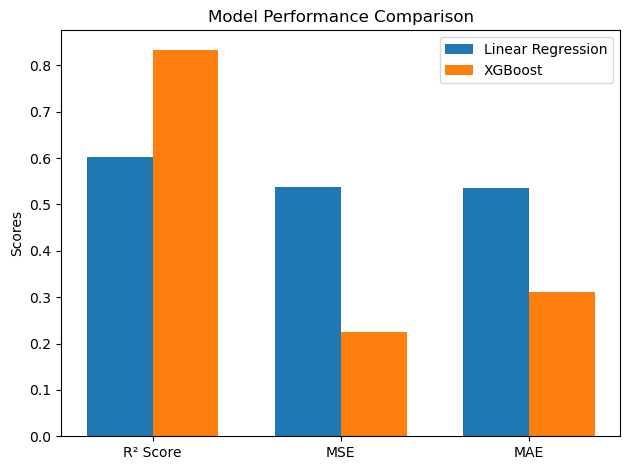

In [17]:
metrics = ['R² Score', 'MSE', 'MAE']
lr_metrics = [r2_lr, mse_lr, mae_lr]
xgb_metrics = [r2_xgb, mse_xgb, mae_xgb]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_metrics, width, label='Linear Regression')
rects2 = ax.bar(x + width/2, xgb_metrics, width, label='XGBoost')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [18]:
model = XGBRegressor()

In [19]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
training_data_prediction = model.predict(X_train)

In [21]:
from sklearn import metrics

score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


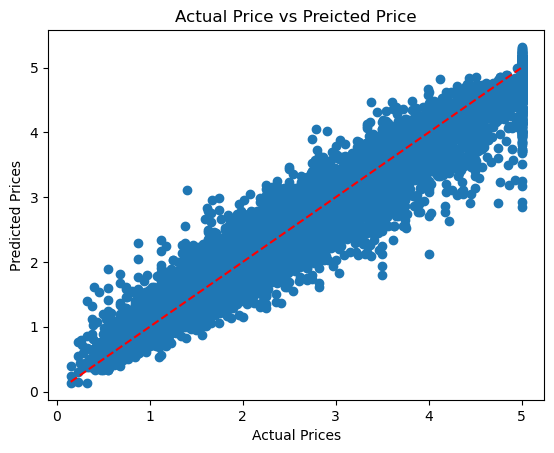

In [22]:
perfect_line = np.linspace(min(Y_train), max(Y_train), 100)
plt.plot(perfect_line, perfect_line, color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [23]:
test_data_prediction = model.predict(X_test)

In [24]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


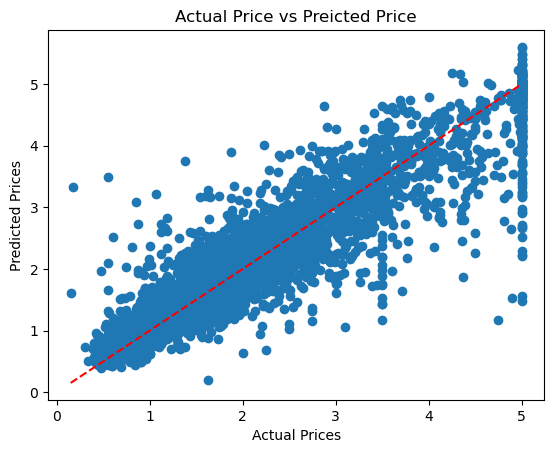

In [25]:
perfect_line = np.linspace(min(Y_test), max(Y_test), 100)
plt.plot(perfect_line, perfect_line, color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

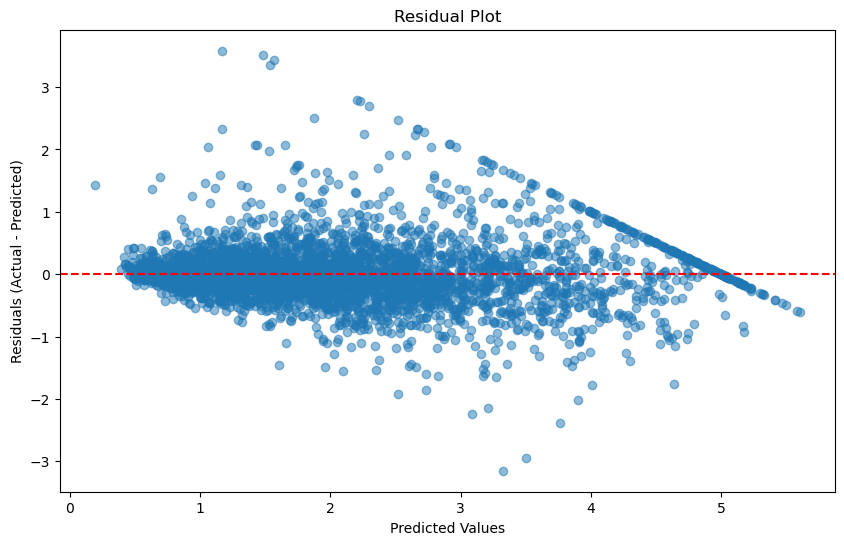

In [26]:
residuals = Y_test - test_data_prediction

plt.figure(figsize=(10, 6))
plt.scatter(test_data_prediction, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()
